# EDA
## TRAIN :
- ID : 과수나무 고유 ID
- 착과량(int) : 실제 감귤 착과량 (Target)
- 나무 생육 상태 Features (5개)
- 수고(m), 수관폭1(min), 수관폭2(max), 수관폭평균(수관폭1과 수관폭2의 평균)

- 데이터 기입은 cm 단위

- 새순 Features (89개)
- 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 새순 데이터

- 엽록소 Features (89개)
- 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 엽록소 데이터

## TEST :
- ID : 과수나무 고유 ID
- 나무 생육 상태 Features (5개)
- 수고(m), 수관폭1(min), 수관폭2(max), 수관폭평균(수관폭1과 수관폭2의 평균)

- 데이터 기입은 cm 단위
- 새순 Features (89개)
- 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 새순 데이터

- 엽록소 Features (89개)
- 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 엽록소 데이터

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [44]:
original_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
original_data.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [69]:
len(original_data)

2207

In [45]:
len(original_data.columns)

184

In [46]:
gyul = original_data.copy()
gyul_test = test_data.copy()

<Axes: xlabel='수고(m)', ylabel='Count'>

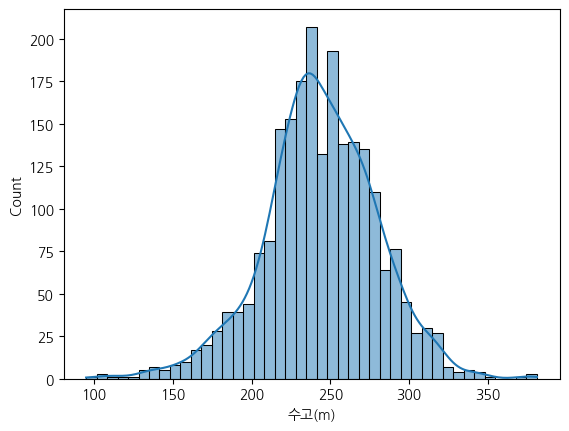

In [47]:
sns.histplot(
    data = gyul,
    x='수고(m)',
    kde =True
)

<Axes: xlabel='수관폭1(min)', ylabel='Count'>

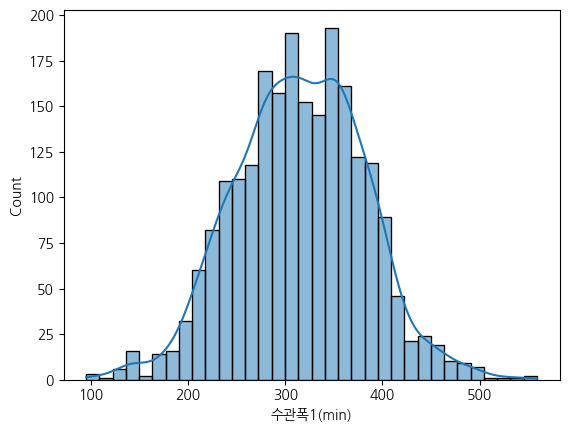

In [48]:
sns.histplot(
    data = gyul,
    x='수관폭1(min)',
    kde =True
)

<Axes: xlabel='수관폭2(max)', ylabel='Count'>

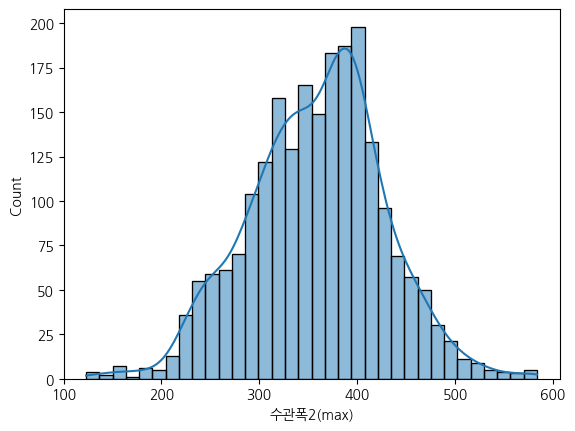

In [49]:
sns.histplot(
    data = gyul,
    x='수관폭2(max)',
    kde =True
)

<Axes: xlabel='수관폭평균', ylabel='Count'>

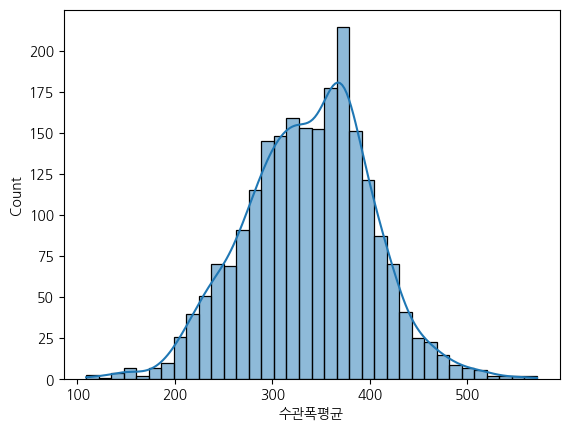

In [50]:
sns.histplot(
    data = gyul,
    x='수관폭평균',
    kde =True
)

In [18]:
y = ['착과량(int)']
id_var = list(gyul.columns[2:6])
saesoon = list(gyul.columns[6:95]) # 시계열성
yuprokso = list(gyul.columns[95:]) # 시계열성

In [72]:
print(gyul[saesoon].T.describe())

            0          1          2          3          4          5     \
count  89.000000  89.000000  89.000000  89.000000  89.000000  89.000000   
mean    1.693258   1.861798   1.762921   1.857303   2.125843   2.278652   
std     0.638143   0.894491   0.712611   0.692802   0.898171   1.107461   
min     0.600000   0.000000   0.500000   0.700000   0.600000   0.000000   
25%     1.100000   1.200000   1.200000   1.300000   1.400000   1.400000   
50%     1.700000   1.900000   1.800000   1.900000   2.100000   2.300000   
75%     2.200000   2.600000   2.400000   2.400000   2.900000   3.200000   
max     2.800000   3.300000   3.000000   3.100000   3.700000   4.100000   

            6          7          8          9     ...       2197       2198  \
count  89.000000  89.000000  89.000000  89.000000  ...  89.000000  89.000000   
mean    1.714607   2.006742   1.730337   2.593258  ...   2.593258   2.489888   
std     0.673956   0.848903   0.644981   1.308868  ...   1.161288   1.149906   
min 

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [82]:
X = gyul.drop(['ID','착과량(int)'],axis=1)
y= gyul['착과량(int)']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=15)

In [83]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test,y_pred)

1517.7192495475113

In [21]:
train_melt = gyul.melt(id_vars=['ID']+y+id_var, value_vars=saesoon+yuprokso)
test_melt = gyul_test.melt(id_vars=['ID']+id_var, value_vars=saesoon+yuprokso)

train_melt['date'] = train_melt['variable'].apply(lambda x: x.split(' ')[0])
train_melt['type'] = train_melt['variable'].apply(lambda x: x.split(' ')[1])

test_melt['date'] = test_melt['variable'].apply(lambda x: x.split(' ')[0])
test_melt['type'] = test_melt['variable'].apply(lambda x: x.split(' ')[1])

In [22]:
train_melt

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,variable,value,date,type
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2022-09-01 새순,2.800000,2022-09-01,새순
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,2022-09-01 새순,3.300000,2022-09-01,새순
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,2022-09-01 새순,3.000000,2022-09-01,새순
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,2022-09-01 새순,3.100000,2022-09-01,새순
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,2022-09-01 새순,3.700000,2022-09-01,새순
...,...,...,...,...,...,...,...,...,...,...
392841,TRAIN_2202,119,230.0,353.0,367.0,360.0,2022-11-28 엽록소,65.560547,2022-11-28,엽록소
392842,TRAIN_2203,611,266.0,337.0,400.0,368.5,2022-11-28 엽록소,72.944396,2022-11-28,엽록소
392843,TRAIN_2204,650,237.0,353.0,362.0,357.5,2022-11-28 엽록소,66.479459,2022-11-28,엽록소
392844,TRAIN_2205,363,281.0,337.0,403.0,370.0,2022-11-28 엽록소,65.812084,2022-11-28,엽록소


In [24]:
train_melt_preproc = train_melt[['ID']+y+id_var+['date']].drop_duplicates().reset_index(drop=True).merge(
    train_melt[train_melt['type']=='새순'][['ID', 'date', 'value']].rename(columns={'value':'새순'}),
    how='left'
).merge(
    train_melt[(train_melt['type']=='새순')&(train_melt['date']=='2022-09-01')][['ID', 'value']].rename(columns={'value':'새순0'}),
    how='left'
).merge(
    train_melt[(train_melt['type']=='새순')&(train_melt['date']=='2022-10-15')][['ID', 'value']].rename(columns={'value':'새순1'}),
    how='left'
).merge(
    train_melt[train_melt['type']=='엽록소'][['ID', 'date', 'value']].rename(columns={'value':'엽록소'}),
    how='left'
)
train_melt_preproc['새순diff0'] = train_melt_preproc['새순']-train_melt_preproc['새순0']
train_melt_preproc['새순diff1'] = train_melt_preproc['새순']-train_melt_preproc['새순1']
train_melt_preproc['엽록소_새순'] = train_melt_preproc['엽록소']/(train_melt_preproc['새순']+0.1)  # 분모 0 방지

In [57]:
test_melt_preproc = test_melt[['ID']+id_var+['date']].drop_duplicates().reset_index(drop=True).merge(
    test_melt[test_melt['type']=='새순'][['ID', 'date', 'value']].rename(columns={'value':'새순'}),
    how='left'
).merge(
    test_melt[(test_melt['type']=='새순')&(test_melt['date']=='2022-09-01')][['ID', 'value']].rename(columns={'value':'새순0'}),
    how='left'
).merge(
    test_melt[(test_melt['type']=='새순')&(test_melt['date']=='2022-10-15')][['ID', 'value']].rename(columns={'value':'새순1'}),
    how='left'
).merge(
    test_melt[test_melt['type']=='엽록소'][['ID', 'date', 'value']].rename(columns={'value':'엽록소'}),
    how='left'
)
test_melt_preproc['새순diff0'] = test_melt_preproc['새순']-test_melt_preproc['새순0']
test_melt_preproc['새순diff1'] = test_melt_preproc['새순']-test_melt_preproc['새순1']
test_melt_preproc['엽록소_새순'] = test_melt_preproc['엽록소']/(test_melt_preproc['새순']+0.1) # 분모 0 방지


In [64]:
train_melt_preproc.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,date,새순,새순0,새순1,엽록소,새순diff0,새순diff1,엽록소_새순
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2022-09-01,2.8,2.8,1.7,78.336504,0.0,1.1,27.012587
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,2022-09-01,3.3,3.3,1.9,80.116691,0.0,1.4,23.563733
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,2022-09-01,3.0,3.0,1.8,79.118529,0.0,1.2,25.522106
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,2022-09-01,3.1,3.1,1.9,77.936262,0.0,1.2,24.355082
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,2022-09-01,3.7,3.7,2.1,76.233231,0.0,1.6,20.061377


<Axes: xlabel='date', ylabel='새순0'>

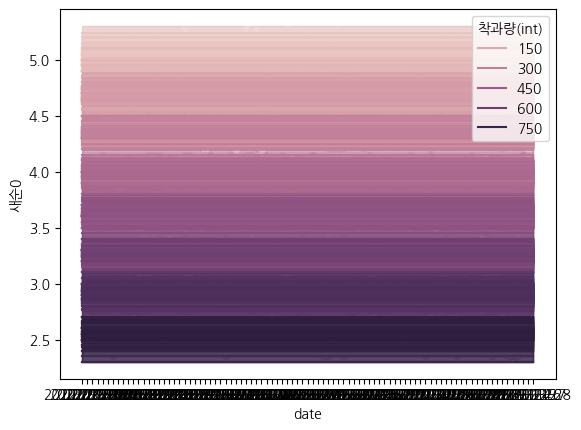

In [65]:
plt.figure
sns.lineplot(data=train_melt_preproc, x= 'date', y='새순0', hue='착과량(int)')

In [27]:
train_df = train_melt_preproc.pivot(index=['ID']+y+id_var, columns=['date'], values=['새순diff0','새순diff1','새순', '엽록소_새순']).reset_index()
test_df = test_melt_preproc.pivot(index=['ID']+id_var, columns=['date'], values=['새순diff0','새순diff1', '새순', '엽록소_새순']).reset_index()

In [33]:
train_df.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순diff0 2022-09-01,새순diff0 2022-09-02,새순diff0 2022-09-03,새순diff0 2022-09-04,...,엽록소_새순 2022-11-19,엽록소_새순 2022-11-20,엽록소_새순 2022-11-21,엽록소_새순 2022-11-22,엽록소_새순 2022-11-23,엽록소_새순 2022-11-24,엽록소_새순 2022-11-25,엽록소_새순 2022-11-26,엽록소_새순 2022-11-27,엽록소_새순 2022-11-28
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,0.0,0.0,-0.1,-0.1,...,70.978249,78.751993,78.561392,78.399559,88.034195,87.925614,87.867287,87.828027,87.712301,100.061788
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,0.0,0.0,0.0,-0.1,...,89.419354,89.227879,101.790862,101.560951,101.365154,117.994384,705.975500,705.650877,705.605022,704.276003
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,0.0,-0.1,-0.1,-0.1,...,79.199782,79.110633,88.930026,88.783425,88.650048,88.595904,101.014470,100.851388,100.597433,117.332631
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,0.0,-0.1,-0.1,-0.1,...,69.934615,69.884124,69.845683,77.549647,77.533125,77.349604,77.172671,86.601987,86.548361,86.417462
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,0.0,-0.1,-0.1,-0.1,...,68.313016,68.285364,75.788734,75.788286,75.600092,84.824954,84.719445,84.626821,96.434635,96.300133


In [28]:
vars = []
for x in train_df.columns:
    if x[1]=='':
        vars.append(x[0])
    else:
        vars.append(x[0]+ ' ' + x[1])

train_df.columns = vars
test_df.columns  = ['ID']+ vars[2:]

In [32]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_df.iloc[:,2:] , train_df[y], test_size=0.4, random_state=1740)